# Explore here

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos.
Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

Paso 1: Carga del conjunto de datos

In [1011]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [1012]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.head()

datacore = data.copy()

Analisis de variables numericas

In [1013]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [1014]:
print("cantidad de filas y columnas", data.shape)
print("Nombre de las columnas",data.columns)
data.info()

cantidad de filas y columnas (1338, 7)
Nombre de las columnas Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Paso 2: Realiza un EDA completo

Analisis de variables numericas

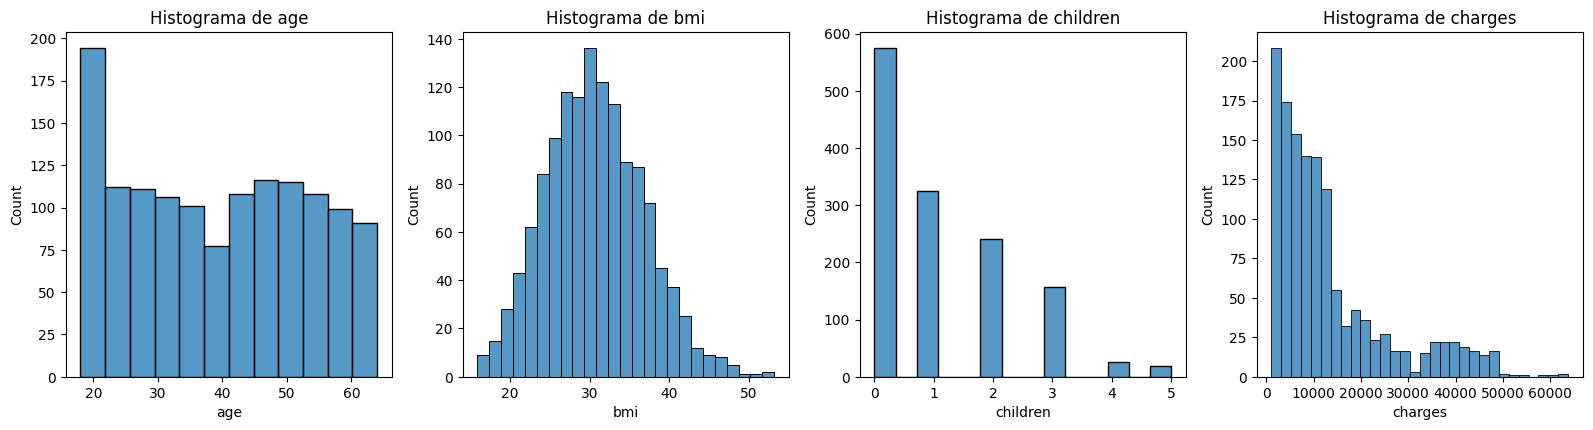

In [1015]:
# Paso 1: Obtener columnas numéricas
var = data.select_dtypes(include='number').columns.tolist()

# Paso 2: Definir dimensiones fijas del grid
filas = 2
columnas = 5

# Paso 3: Crear subplots
fig, axes = plt.subplots(filas, columnas, figsize=(20, 8))  # Ajusta tamaño como quieras

axes = axes.flatten()  # Aplanar para acceso fácil

# Paso 4: Graficar cada variable
for i, col in enumerate(var):
    if i < len(axes):  # Para no pasarte del número de axes
        sns.histplot(data=data, x=col, ax=axes[i])
        axes[i].set_title(f"Histograma de {col}")

# Si sobran subplots, los apagas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Analisis de variables categoricas



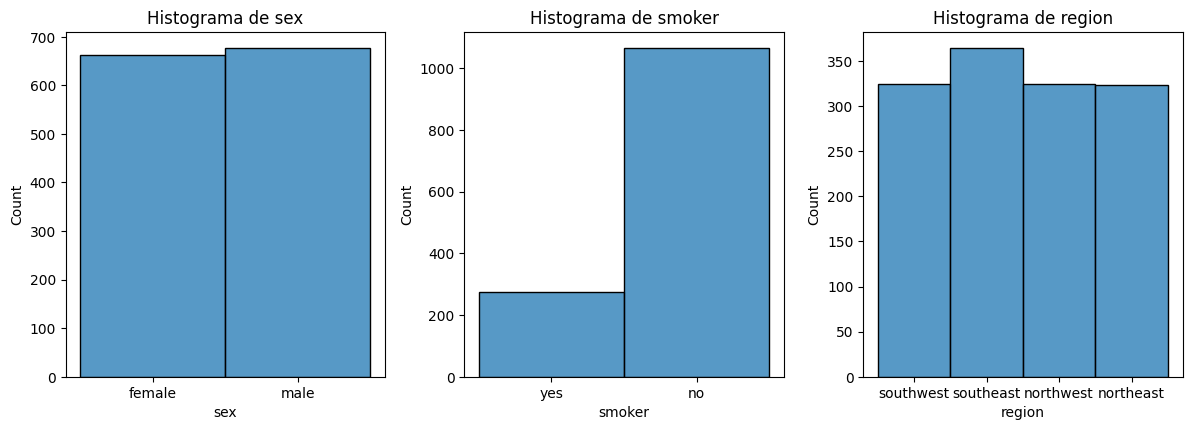

In [1016]:

#Analisis de variables categoricas
# Visualización de variables categóricas

# Paso 1: Obtener columnas numéricas
var = data.select_dtypes(include='object').columns.tolist()

# Paso 2: Definir dimensiones fijas del grid
filas = 2
columnas = 5

# Paso 3: Crear subplots
fig, axes = plt.subplots(filas, columnas, figsize=(20, 8))  # Ajusta tamaño como quieras

axes = axes.flatten()  # Aplanar para acceso fácil

# Paso 4: Graficar cada variable
for i, col in enumerate(var):
    if i < len(axes):  # Para no pasarte del número de axes
        sns.histplot(data=data, x=col, ax=axes[i])
        axes[i].set_title(f"Histograma de {col}")

# Si sobran subplots, los apagas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

En la visualizacion de los datos podemos ver que los datos se encuentran bastante balanceados. A exepcion de la variable smoker que en este caso existen mas casos de no fumadores.

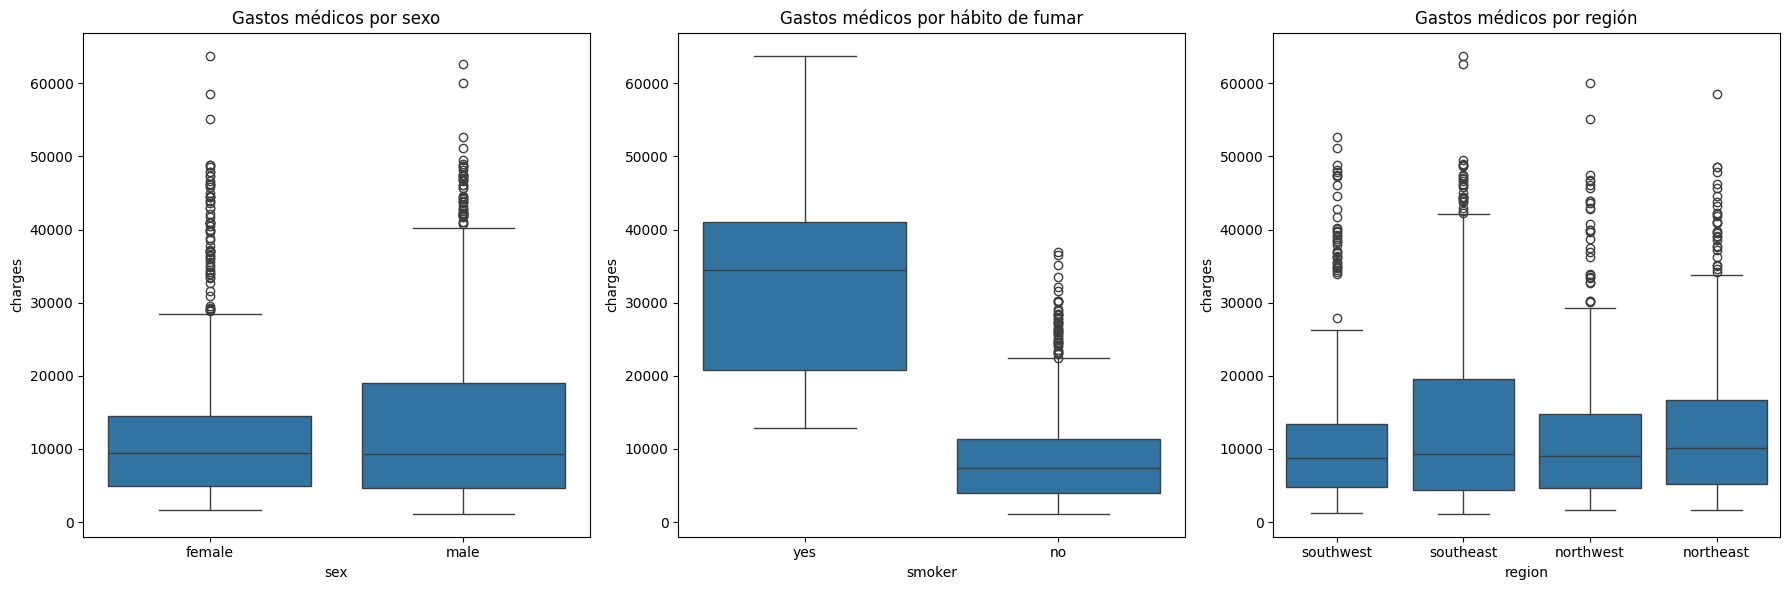

In [1017]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(18, 6))  # Una fila, tres columnas

# Sexo vs Charges
sns.boxplot(ax=axis[0], data=data, x="sex", y="charges")
axis[0].set_title("Gastos médicos por sexo")

# Fumador vs Charges
sns.boxplot(ax=axis[1], data=data, x="smoker", y="charges")
axis[1].set_title("Gastos médicos por hábito de fumar")

# Región vs Charges
sns.boxplot(ax=axis[2], data=data, x="region", y="charges")
axis[2].set_title("Gastos médicos por región")

plt.tight_layout()
plt.show()

Podemos ver que existen algunos outliers.

Matriz de correlacion de variables numericas.

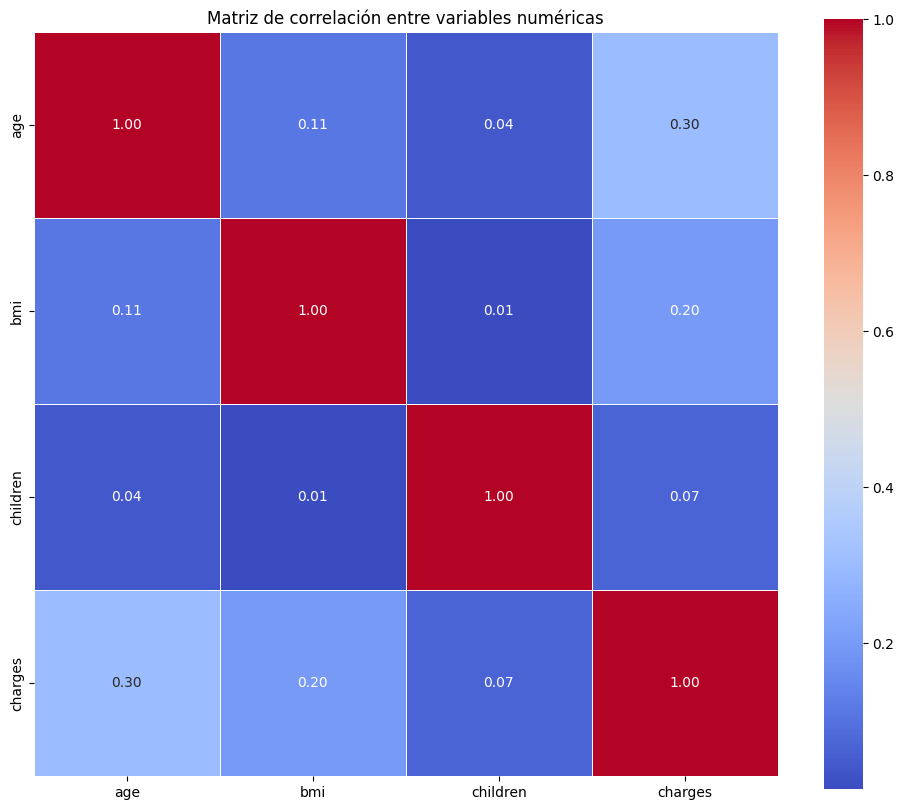

In [1018]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas
num_data = datacore.select_dtypes(include='number')

# Calculamos la matriz de correlación
corr_matrix = num_data.corr()

# Creamos el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

No existe mucha correlacion entre nuestras variables, lo cual es bueno por que necesitamos no multicoloneidad.

Maztriz de correlacion variables numericas y categoricas.

In [1019]:
datacore.columns
datacore["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

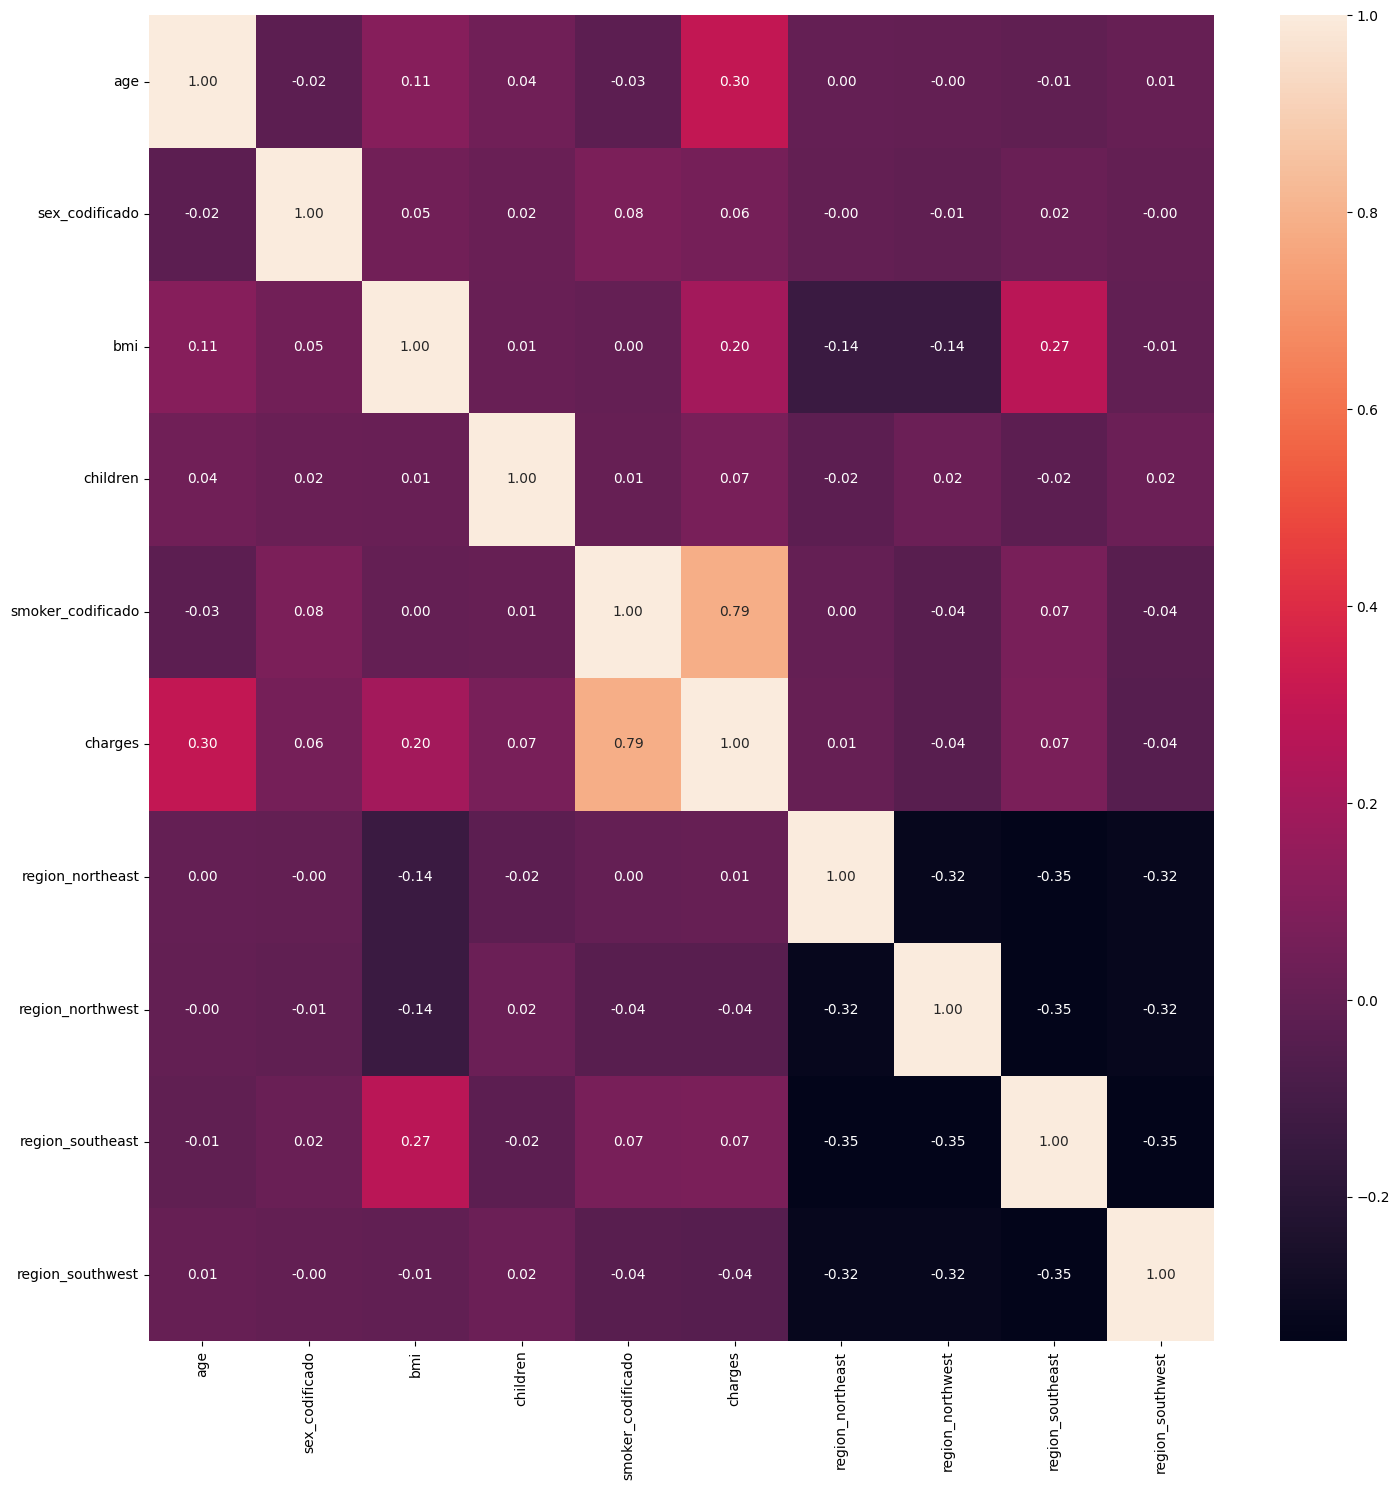

In [1020]:
datacore["sex_codificado"]  = datacore["sex"].map({'female': 0, 'male': 1})
datacore["smoker_codificado"]  = datacore["smoker"].map({'yes': 1, 'no': 0})
#datacore["region_codificado"]  = datacore["region"].map({'southeast': 1, 'northeast': 0, "southwest": 2})
datacore = pd.get_dummies(datacore, columns=['region'], drop_first=False)



# Ver el resultado

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(datacore[['age', "sex_codificado", 'bmi', 'children', "smoker_codificado", 'charges', "region_northeast", "region_northwest","region_southeast","region_southwest"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

smoker 0.79	, Fuerte correlación negativa (¡muy importante!). Esto indica que ser fumador impacta mucho en los gastos, ya que los valores factorizados (como 1 para fumador y 0 para no fumador) están inversamente correlacionados con el gasto.

age 	0.30	, Correlación moderada: a mayor edad, mayor gasto. Esperado en temas de salud.

bmi	    0.20	, Relación positiva débil: el sobrepeso u obesidad podría influir en los costos médicos.


In [1021]:
datacore.head()

,age,sex,bmi,children,smoker,charges,sex_codificado,smoker_codificado,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,1,False,False,False,True
1,18,male,33.770,1,no,1725.55230,1,0,False,False,True,False
2,28,male,33.000,3,no,4449.46200,1,0,False,False,True,False
3,33,male,22.705,0,no,21984.47061,1,0,False,True,False,False
4,32,male,28.880,0,no,3866.85520,1,0,False,True,False,False


In [1022]:
#Eliminamos variables que carecen de inportancia en nuestro analisis
datafinal = data.copy()
# Eliminar columnas solo si existen
columns_to_drop = ["children", "sex"]
columns_to_drop = [col for col in columns_to_drop if col in datafinal.columns]  # Filtrar solo las que existen
datafinal= datafinal.drop(columns=columns_to_drop)

print(datafinal.columns)
datafinal

Index(['age', 'bmi', 'smoker', 'region', 'charges'], dtype='object')


,age,bmi,smoker,region,charges
0,19,27.900,yes,southwest,16884.92400
1,18,33.770,no,southeast,1725.55230
2,28,33.000,no,southeast,4449.46200
3,33,22.705,no,northwest,21984.47061
4,32,28.880,no,northwest,3866.85520
...,...,...,...,...,...
1333,50,30.970,no,northwest,10600.54830
1334,18,31.920,no,northeast,2205.98080
1335,18,36.850,no,southeast,1629.83350
1336,21,25.800,no,southwest,2007.94500


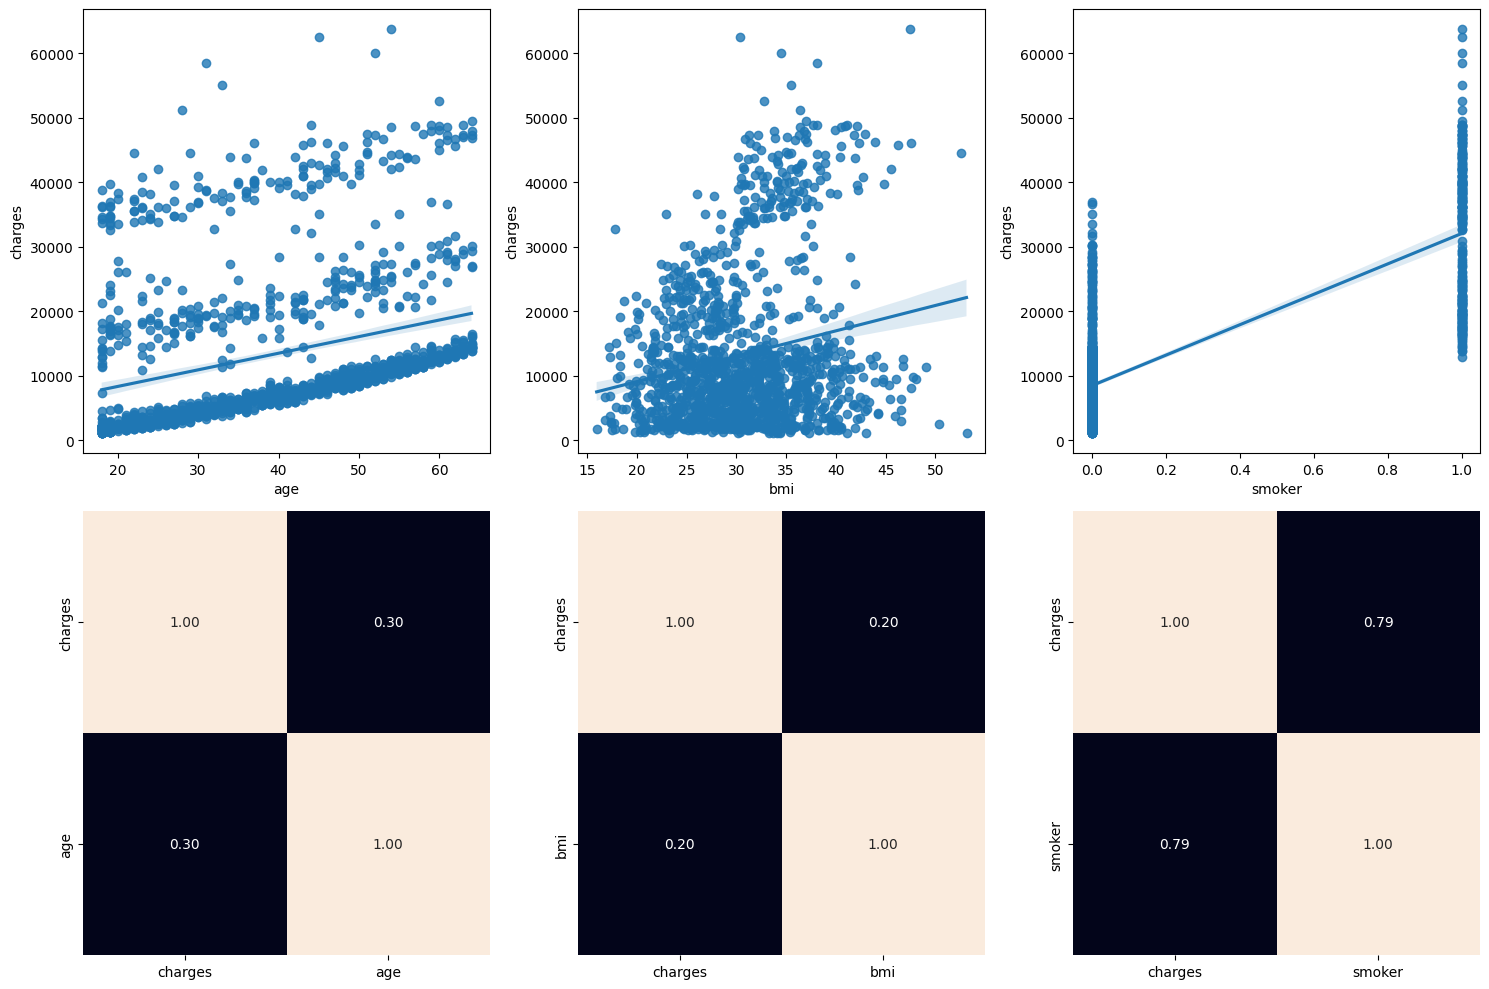

In [1023]:

data2 = data.copy()

# Asegúrate de usar el mismo DataFrame
data2["smoker"] = data2["smoker"].map({"yes": 1, "no": 0})  # O ya debería estar hecho

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Gráfico 1: age vs charges
sns.regplot(ax=axes[0, 0], data=data2, x="age", y="charges")
sns.heatmap(data2[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axes[1, 0], cbar=False)

# Gráfico 2: bmi vs charges
sns.regplot(ax=axes[0, 1], data=data2, x="bmi", y="charges")
sns.heatmap(data2[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axes[1, 1], cbar=False)

# Gráfico 3: smoker vs charges
sns.regplot(ax=axes[0, 2], data=data2, x="smoker", y="charges")
sns.heatmap(data2[["charges", "smoker"]].corr(), annot=True, fmt=".2f", ax=axes[1, 2], cbar=False)

plt.tight_layout()
plt.show()

Podemos ver que ser fumador impacta mucho en los gastos,

Descripcion de columnas

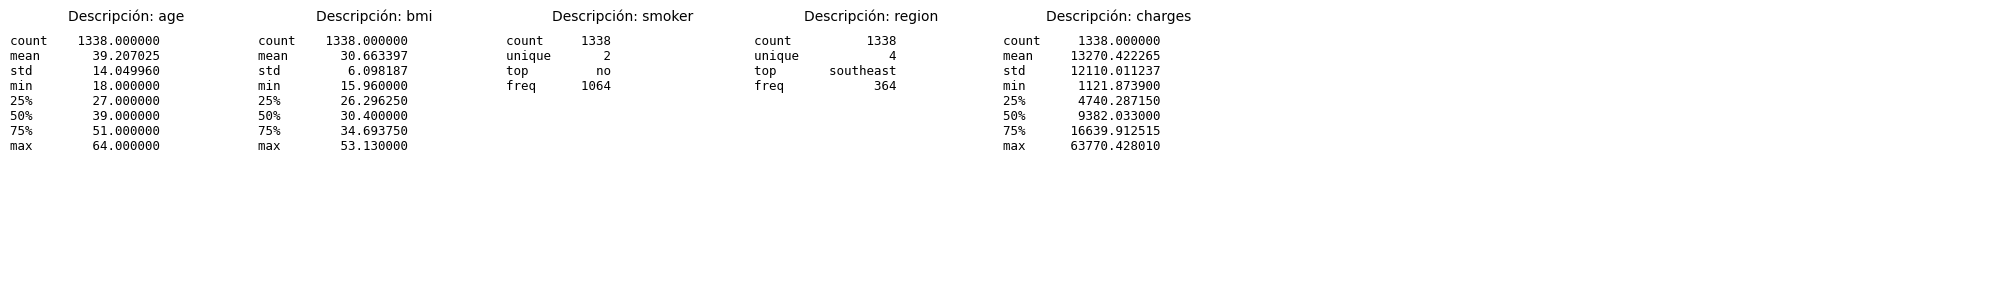

In [1024]:
# Paso 1: Columnas
columnas = datafinal.columns
n = len(columnas)

# Aquí guardaremos las descripciones como diccionario
descripciones = {}

# Paso 2: Definir grid
filas = (n + 7) // 8  # 8 columnas por fila
fig, axes = plt.subplots(filas, 8, figsize=(20, 3 * filas))
axes = axes.flatten()

# Paso 3: Guardar descripciones y graficarlas
for i, col in enumerate(columnas):
    descripcion = datafinal[col].describe()
    
    # Guardamos en el diccionario
    descripciones[col] = descripcion
    
    # Convertimos a texto para graficarlo
    texto = descripcion.to_string()

    axes[i].axis('off')
    axes[i].text(0, 1, texto, fontsize=9, va='top', ha='left', family='monospace')
    axes[i].set_title(f"Descripción: {col}", fontsize=10, pad=10)

# Apagamos los subplots vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

Limpieza de outlers por columnas



In [1025]:
# Crear una copia de `datafinal` para limpiarlo sin modificar el original
datafinal_limpio = datafinal.copy()

# Iteramos sobre las columnas en el diccionario de descripciones
for columna in descripciones:
    descripcion = descripciones[columna]

    # Revisamos que existan los cuartiles
    if "75%" in descripcion.index and "25%" in descripcion.index:
        rango_iqr = descripcion["75%"] - descripcion["25%"]
        limite_superior = descripcion["75%"] + 1.5 * rango_iqr
        limite_inferior = descripcion["25%"] - 1.5 * rango_iqr

        # Poner NaN donde haya outliers
        datafinal_limpio.loc[(datafinal_limpio[columna] < limite_inferior) | (datafinal_limpio[columna] > limite_superior), columna] = np.nan
    else:
        print(f"Saltando columna {columna}: es una variable categórica")

# Eliminar las filas con al menos un NaN (outliers)
datafinal_limpio = datafinal_limpio.dropna()
datosdemodelo= datafinal_limpio
datosdemodelo2= datafinal_limpio
# Mostrar el dataset limpio
datafinal_limpio.head()

Saltando columna smoker: es una variable categórica
Saltando columna region: es una variable categórica


,age,bmi,smoker,region,charges
0,19.0,27.900,yes,southwest,16884.92400
1,18.0,33.770,no,southeast,1725.55230
2,28.0,33.000,no,southeast,4449.46200
3,33.0,22.705,no,northwest,21984.47061
4,32.0,28.880,no,northwest,3866.85520


In [1026]:
print(datafinal.shape, " VS ", datafinal_limpio.shape)

(1338, 5)  VS  (1193, 5)


Paso 3: Construir un modelo de regresion lineal 

Primer modelo con statsmodels


In [1027]:
X= datacore.drop(["charges","smoker","sex"], axis=1) # quitamos columnas que no necesitamos para el entrenamiento de nuestro modelo
bool_columns = X.select_dtypes(include="bool").columns #Seleccionamos columnas que transformamos en false o true para convertirlos en valor numerico, ya que solo acepta valores int o float
X[bool_columns]= X[bool_columns].astype(int) # Convertimos en int
X= sm.add_constant(X)
Y= datacore["charges"]
model= sm.OLS(Y, X).fit()
#print(X.dtypes)
#print(Y.dtypes)
#print(bool_columns)


In [1028]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                        23:12:21   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.002e+04    781.64

In [1029]:
model.params["sex_codificado"]

np.float64(-131.31435939511096)

Ser hombre (valor = 1) se asocia con una reducción promedio de $131.31 en los costos del seguro médico, comparado con ser mujer (valor = 0), manteniendo constantes las demás variables.

Volvemos a entrenar nuestro modelo, sin la variable sexo

In [1030]:
X= datacore.drop(["charges","smoker","sex","sex_codificado"], axis=1) # quitamos columnas que no necesitamos para el entrenamiento de nuestro modelo
bool_columns = X.select_dtypes(include="bool").columns #Seleccionamos columnas que transformamos en false o true para convertirlos en valor numerico, ya que solo acepta valores int o float
X[bool_columns]= X[bool_columns].astype(int) # Convertimos en int
X= sm.add_constant(X)
Y= datacore["charges"]
model= sm.OLS(Y, X).fit()
print(datacore.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'sex_codificado',
       'smoker_codificado', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [1031]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                        23:12:22   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.006e+04    774.46

0       25217.897406
1        3512.165759
2        6770.262752
3        3827.056827
4        5661.337382
            ...     
1333    12418.370368
1334     3445.429837
1335     4080.686373
1336     1184.348329
1337    37014.218057
Length: 1338, dtype: float64


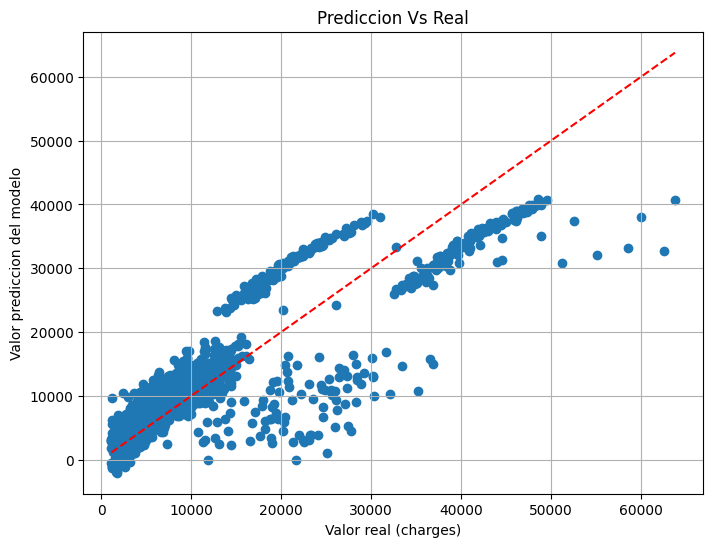

In [1032]:
y_pred = model.predict(X)
print(y_pred )
#Grafica de dispersion 
plt.figure(figsize=(8,6))
plt.scatter(x=Y, y=y_pred)
plt.xlabel("Valor real (charges)")
plt.ylabel("Valor prediccion del modelo")
plt.title("Prediccion Vs Real")
plt.plot([Y.min(), Y.max()],[Y.min(), Y.max()], "r--")
plt.grid(True)
plt.show()

Con limpieza de outlers.

In [1033]:
#Codificacion de variables
datafinal_limpio["smoker_codificado"]  =  datafinal_limpio["smoker"].map({'yes': 1, 'no': 0})
#datacore["region_codificado"]  = datacore["region"].map({'southeast': 1, 'northeast': 0, "southwest": 2})
datafinal_limpio = pd.get_dummies( datafinal_limpio, columns=['region'], drop_first=False)

#Entrenar modelo
X= datafinal_limpio.drop(["charges","smoker"], axis=1) # quitamos columnas que no necesitamos para el entrenamiento de nuestro modelo
bool_columns = X.select_dtypes(include="bool").columns #Seleccionamos columnas que transformamos en false o true para convertirlos en valor numerico, ya que solo acepta valores int o float
X[bool_columns]= X[bool_columns].astype(int) # Convertimos en int
X= sm.add_constant(X)
Y= datafinal_limpio["charges"]
model= sm.OLS(Y, X).fit()
print(datacore.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'sex_codificado',
       'smoker_codificado', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


0       17224.077646
1        3019.890076
2        5401.627169
3        6624.071343
4        6841.802259
            ...     
1333    11388.805131
1334     3914.866402
1335     3250.160041
1336     2903.913302
1337    28581.013534
Length: 1193, dtype: float64


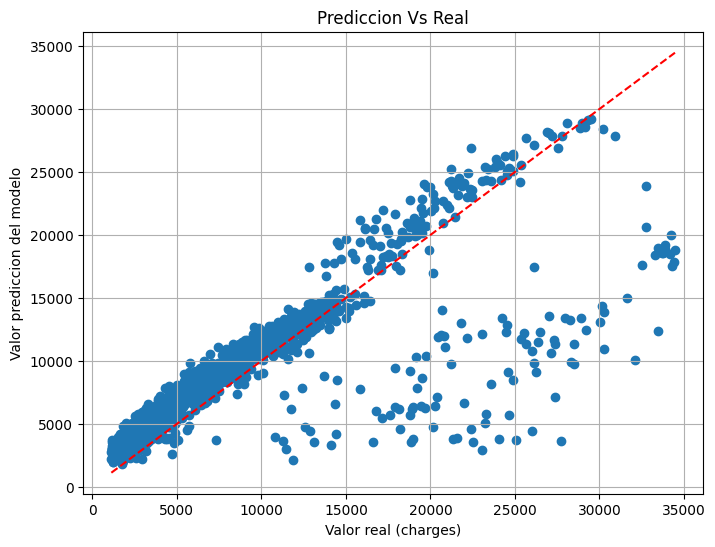

In [1034]:
y_pred = model.predict(X)
print(y_pred )
#Grafica de dispersion 
plt.figure(figsize=(8,6))
plt.scatter(x=Y, y=y_pred)
plt.xlabel("Valor real (charges)")
plt.ylabel("Valor prediccion del modelo")
plt.title("Prediccion Vs Real")
plt.plot([Y.min(), Y.max()],[Y.min(), Y.max()], "r--")
plt.grid(True)
plt.show()

Podemos ver que el modelo se ajusta mucho mejor a los datos aunque con algunos outlers

In [1035]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 2590.34


In [1036]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     295.2
Date:                Thu, 01 May 2025   Prob (F-statistic):          3.30e-231
Time:                        23:12:22   Log-Likelihood:                -11752.
No. Observations:                1193   AIC:                         2.352e+04
Df Residuals:                    1186   BIC:                         2.355e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2805.7116    647.38

Primer modelo limpiando outlers(Sklearn)

In [1037]:
print(datafinal_limpio.head())

    age     bmi smoker      charges  smoker_codificado  region_northeast  \
0  19.0  27.900    yes  16884.92400                  1             False   
1  18.0  33.770     no   1725.55230                  0             False   
2  28.0  33.000     no   4449.46200                  0             False   
3  33.0  22.705     no  21984.47061                  0             False   
4  32.0  28.880     no   3866.85520                  0             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


In [1039]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Variable objetivo
y = datafinal_limpio["charges"]
# Variables predictoras
X = datafinal_limpio.drop(["charges",'smoker'], axis=1)
X= sm.add_constant(X)
bool_columns = X.select_dtypes(include="bool").columns #Seleccionamos columnas que transformamos en false o true para convertirlos en valor numerico, ya que solo acepta valores int o float
X[bool_columns]= X[bool_columns].astype(int) # Convertimos en int
#Convertimos columnas en 0s y 1s
#X = pd.get_dummies(X, columns=[])

# Separar en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1040]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): -3523.1248023242624
Coeficientes (b1, b2): [    0.           244.52039771    73.09046716 15499.24228489
   905.26681498   280.11780168  -365.63578938  -819.74882728]


In [1041]:
y_pred = model.predict(X_test)
y_pred

array([ 8559.39356084,  5708.66396851,  2400.71033457,  5580.9939394 ,
        3999.78485426,  8773.67976982, 13404.37759087, 12861.48882451,
        3452.43629667, 24575.94692487,  4464.07393232, 24470.29841476,
       20275.38798549, 12440.66473423,  4655.63652639,  4983.54096414,
        2988.91159466, 23015.3677821 ,  4828.09655751, 20795.77437374,
       11193.47908402,  6285.28616063, 11655.0276462 ,  1662.4966162 ,
        3692.99762616,  9970.21176088,  3691.8068903 ,  4020.65736731,
        7100.84050352, 12093.81768248,  7636.08755587,  5122.99275234,
       11705.99892555,  4928.29606763, 11183.82844513,  7601.42010698,
        6818.67385259,  4883.64531256, 19613.33935707, 14815.72570306,
        9896.27429593,  3992.7518496 , 14474.22050306,  2104.51694197,
        3423.06896962, 12542.68324749,  6706.61112569, 13908.80016945,
       12159.22470573,  3437.75263314, 26971.05114694,  5843.58145052,
       26195.04085762, 20209.76223175,  9195.45280894, 11994.07303499,
      

In [1042]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 18625970.669301394
Coeficiente de determinación: 0.6104400878685942


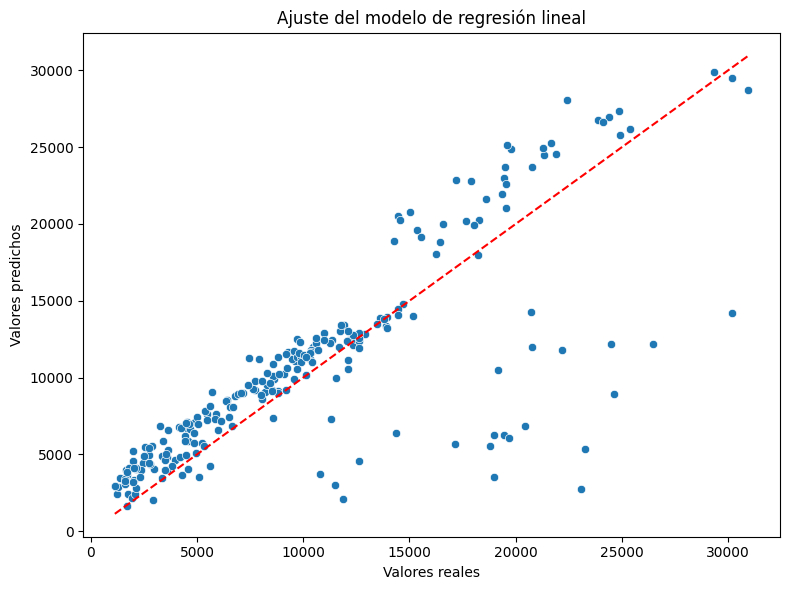

In [1043]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Ajuste del modelo de regresión lineal")
plt.tight_layout()
plt.show()

Segundo modelo sin limpiar outlers (Sklearn)

In [1044]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Variable objetivo
y = datafinal["charges"]
# Variables predictoras
X = datafinal.drop(["charges"], axis=1)

#Convertimos columnas en 0s y 1s
X = pd.get_dummies(X, columns=['smoker',"region"])

# Separar en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 8587.27196862,  7547.75294345, 37425.46196675,  8701.52869194,
       27453.35238276, 10892.92679728,   614.37122585, 17460.89902982,
        1525.99409809, 10470.50611784, 27302.91194684,  9035.90090732,
        5251.27592106, 37626.87817803, 40775.23521697, 36738.4392368 ,
       14842.17675859, 35960.96525451,  9140.3926301 , 31980.98628194,
        2164.77242872,  9759.61463729,  2796.90530009,  7548.27667781,
       10537.92263534, 13446.56771105, 15008.46939327,  5342.30237431,
        9585.4040359 ,  2584.52055813,  7871.15527906, 13599.73535468,
        4954.27333397,  2602.94040943,  4477.10299896, 13511.27385642,
        1969.15149989,  8850.87881385, 33387.08589526, 32627.80362105,
        2191.08141779,  4365.73902216, 14207.02458214, 11975.99628689,
        8361.5828614 , 12191.28558778,  4873.85519284,  2299.39995812,
       34701.78684342,  8731.60306165, 16324.5181212 ,  2325.36256403,
       12421.68051892,  1906.97218475, 13880.30919299, 12217.68049407,
      

In [ ]:
print(Y.shape)
print(y_pred.shape)

(1338,)
(268,)


In [ ]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): -170.50185184365728
Coeficientes (b1, b2): [   259.2607469     336.5688235  -11836.77568595  11836.77568595
    454.69576449    117.84751152   -219.07968849   -353.46358753]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 34142985.95488193
Coeficiente de determinación: 0.7800755882073591


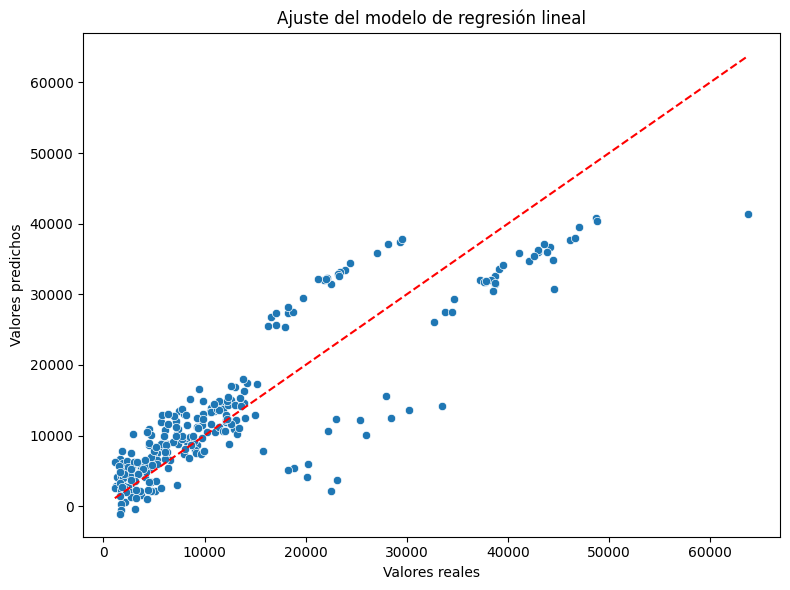

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Ajuste del modelo de regresión lineal")
plt.tight_layout()
plt.show()

RMSE más bajo con outliers eliminados sugiere que el modelo se ajusta mejor en términos absolutos a los datos limpios (predice más cerca del valor real).

R² más alto con outliers presentes indica que el modelo explica más varianza cuando los outliers están incluidos. Pero esto no necesariamente es bueno: los outliers pueden estar sesgando el modelo y dándole una falsa sensación de “mejor ajuste”.